In [16]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import integrate


In [17]:
""" Probability Distribution """
def normalize_mu(p):
    p_total, _ = integrate.nquad(lambda *x: p(np.array(x)), [[0, 1], [0, 1]])
    print("p_total: ", p_total)
    return lambda x: p(x)/p_total

# Grid and Display
X,Y = np.meshgrid(*[np.linspace(0,1)]*2)
_s = np.stack([X.ravel(), Y.ravel()]).T



p_total:  0.18140542135542154


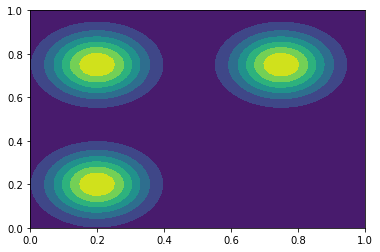

In [18]:
def unnorm_p1(x): 
    return np.exp(-50.5 * np.sum((x[:2] - 0.2)**2)) \
            + np.exp(-50.5 * np.sum((x[:2] - 0.75)**2)) \
            + np.exp(-50.5 * np.sum((x[:2] - np.array([0.2, 0.75]))**2))
p1 = normalize_mu(unnorm_p1)

plt.contourf(X, Y, np.array(list(map(p1, _s))).reshape(X.shape))

p_total:  0.1863622475404353


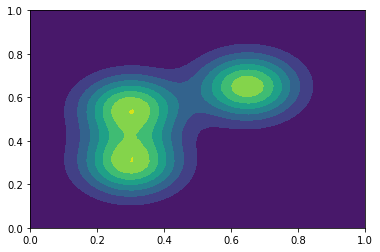

In [19]:
def unnorm_p2(x): 
    return np.exp(-50.5 * np.sum((x[:2] - 0.3)**2)) \
            + np.exp(-50.5 * np.sum((x[:2] - 0.65)**2)) \
            + np.exp(-50.5 * np.sum((x[:2] - np.array([0.3, 0.55]))**2))
p2 = normalize_mu(unnorm_p2)

plt.contourf(X, Y, np.array(list(map(p2, _s))).reshape(X.shape)) 

p_total:  0.36045153878131936


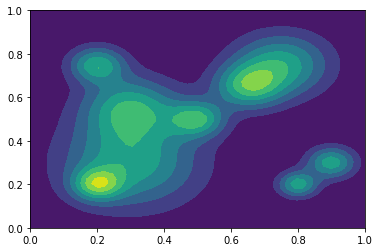

In [25]:
def unnorm_p3(x):
    return np.exp(-25 * np.sum((x[:2] - 0.3)**2)) \
            + np.exp(-100 * np.sum((x[:2] - 0.65)**2)) \
            + np.exp(-50.5 * np.sum((x[:2] - np.array([0.3, 0.55]))**2)) \
            + np.exp(-200 * np.sum((x[:2] - 0.2)**2)) \
            + np.exp(-50 * np.sum((x[:2] - 0.75)**2)) \
            + np.exp(-150 * np.sum((x[:2] - np.array([0.2, 0.75]))**2)) \
            + np.exp(-150 * np.sum((x[:2] - np.array([0.5, 0.5]))**2)) \
            + np.exp(-300 * np.sum((x[:2] - np.array([0.8, 0.2]))**2)) \
            + np.exp(-200 * np.sum((x[:2] - np.array([0.9, 0.3]))**2))
p3 = normalize_mu(unnorm_p3)

plt.contourf(X, Y, np.array(list(map(p3, _s))).reshape(X.shape))       

p_total:  0.1565996851642199


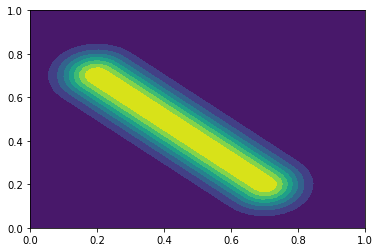

In [35]:
def line(x, p1, p2, r):
    p12 = p2-p1
    mid = (p1+p2)/2
    n = np.array([-p12[1], p12[0]])
    n = n / np.linalg.norm(n)
    dist_p12 = np.dot((x-p1), n)**2
    dist_p1 = sum((x-p1)**2)
    dist_p2 = sum((x-p2)**2)
    if np.dot((x-p1), p12) > 0 and np.dot((x-p2), -p12) > 0:
        dist_seg = dist_p12
    else:
        dist_seg = min(dist_p1, dist_p2)
    return np.exp(r * dist_seg)

def unnorm_p4(x):
    return line(x, np.array([0.2, 0.7]), np.array([0.7, 0.2]), -100)
    
p4 = normalize_mu(unnorm_p4)

plt.contourf(X, Y, np.array(list(map(p4, _s))).reshape(X.shape))